In [32]:
# Mengimport beberapa library
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

saham = input('Masukan Emiten saham dengan akhiran .JK: ')

# Mengambil data saham dari finance.yahoo.com 
df = web.DataReader(saham, data_source='yahoo', start='2012-01-01', end='2020-10-27') 

# Membuat data frame baru yang berisi kolom 'Close' 
data = df.filter(['Close'])

# Mengonversi data frame menjadi numpy array
dataset = data.values

# Menghitung jumlah baris untuk melatih model
training_data_len = math.ceil( len(dataset) *.7)

# Melakukan scaling data diantara 0 dan 1 
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset)

# Membuat kumpulan data pelatihan terskala
train_data = scaled_data[0:training_data_len  , : ]

# Memisahkan data menjadi x_train y_train dataset
x_train=[]
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])

# Mengonversi x_train dan y_train menjadi array numpy
x_train, y_train = np.array(x_train), np.array(y_train)

# Membentuk data ke dalam bentuk yang diterima oleh LSTM
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))


Masukan Emiten saham dengan akhiran .JK: UNVR.JK


In [33]:
#Build the LSTM network model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

#Compile the model
model.compile(optimizer='Adam', loss='mean_squared_error')

#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

#Test data set
test_data = scaled_data[training_data_len - 60: , : ]
#Create the x_test and y_test data sets
x_test = []
y_test =  dataset[training_data_len : , : ] #Get all of the rows from index 1603 to the rest and all of the columns (in this case it's only column 'Close'), so 2003 - 1603 = 400 rows of data
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])
    

#Convert x_test to a numpy array 
x_test = np.array(x_test)

#Reshape the data into the shape accepted by the LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

#Getting the models predicted price values
predictions = model.predict(x_test) 
predictions = scaler.inverse_transform(predictions)#Undo scaling

#Calculate/Get the value of RMSE
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
print("RMSE :",rmse)

Epoch 1/1
1480/1480 [==============================] - 91s 62ms/step - loss: 0.0032
RMSE : 352.93481248384273


C:\Users\Lenovo\anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


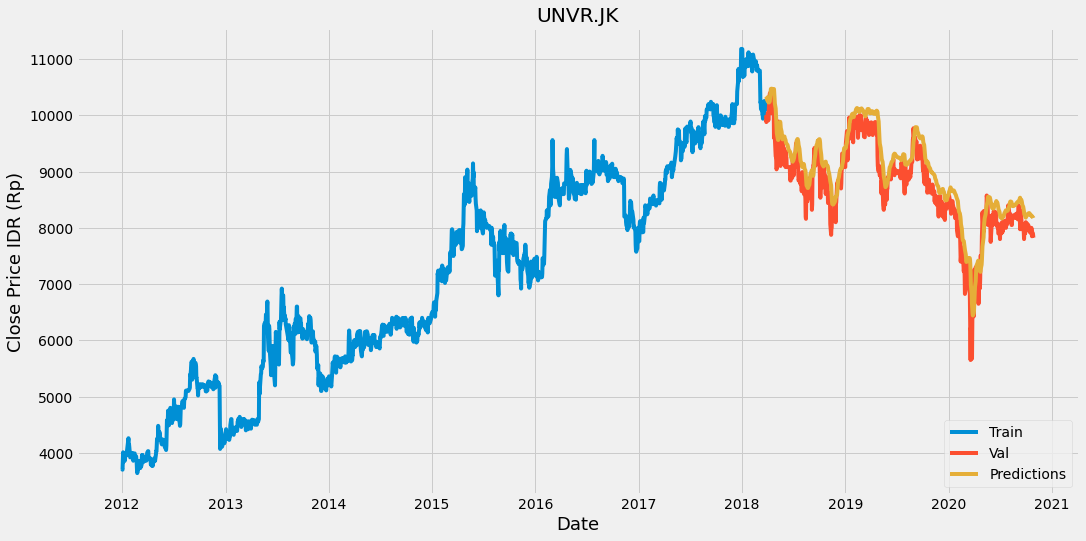

In [34]:
#Plot/Create the data for the graph
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

#Visualize the data
plt.figure(figsize=(16,8))
plt.title(saham)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price IDR (Rp)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()



In [35]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2018-03-27,10000.0,10341.043945
2018-03-28,9880.0,10335.775391
2018-03-29,9905.0,10310.807617
2018-03-30,9905.0,10282.207031
2018-04-02,10040.0,10254.029297
...,...,...
2020-10-21,7950.0,8211.454102
2020-10-22,7850.0,8208.494141
2020-10-23,7925.0,8194.817383


In [36]:
# Dapatkan penawaran harga
saham_offer = web.DataReader(saham, data_source='yahoo', start='2020-01-01', end= '2020-10-27')

# Membuat data frame baru
new_df = BBCA_quote.filter(['Close'])

# Dapatkan harga penutupan 60 hari terakhir 
last_60_days = new_df[-60:].values

# Menskalakan data menjadi nilai antara 0 dan 1
last_60_days_scaled = scaler.transform(last_60_days)

# Membuat list kosong
X_test = []

# Tambahkan 60 hari terakhir
X_test.append(last_60_days_scaled)

# Mengonversi kumpulan data X_test menjadi array numpy
X_test = np.array(X_test)

# Membentuk ulang data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Dapatkan harga skala yang diprediksi
pred_price = model.predict(X_test)

# Membatalkan penskalaan 
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

# Dapatkan penawaran harga
saham_offer2 = web.DataReader(saham, data_source='yahoo', start= '2020-10-27', end= '2020-10-28')
print(saham_offer2['Close'])

# Mencari Akurasi
Accuracy = 1-(sum((abs(predictions-y_test))/y_test)/len(predictions))
print ('The LSTM Accuracy is', Accuracy)

[[3555.356]]
Date
2020-10-27    7825
Name: Close, dtype: int64
The LSTM Accuracy is [0.96505443]
